In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('melb_data.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


Nomor 1 - EDA

1. Feature/Column Landsize & Price

In [25]:
df[['Landsize','Price']].describe()

,Landsize,Price
count,13580.000000,1.358000e+04
mean,558.416127,1.075684e+06
std,3990.669241,6.393107e+05
min,0.000000,8.500000e+04
25%,177.000000,6.500000e+05
50%,440.000000,9.030000e+05
75%,651.000000,1.330000e+06
max,433014.000000,9.000000e+06


Calculation for measuring Data Dispersion and Distribution Landsize & Price

In [45]:
mean    = df['Landsize'].mean()
median  = df['Landsize'].median()
skew    = df['Landsize'].skew()
q1      = np.quantile(df['Landsize'],0.25)
q3      = np.quantile(df['Landsize'],0.75)
iqr     = q3 - q1
upper   = q3 + (1.5*iqr)
lower   = q1 - (1.5*iqr)

meanP    = df['Price'].mean()
medianP  = df['Price'].median()
q1P      = np.quantile(df['Price'],0.25)
q3P      = np.quantile(df['Price'],0.75)
iqrP     = q3P - q1P
upperP   = q3P + (1.5*iqrP)
lowerP   = q1P - (1.5*iqrP)


Below shown that the distribution of each Landsize and Price data using histogram

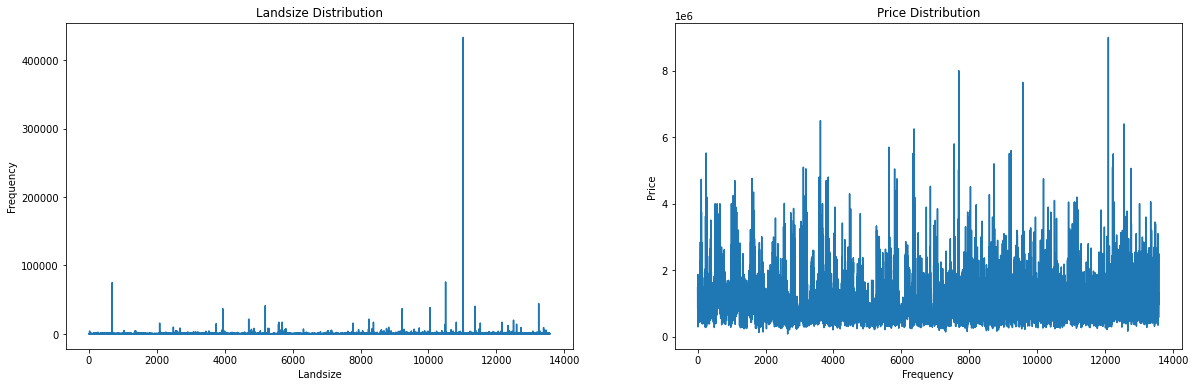

In [134]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,6))

ax1.plot(df['Landsize'])
ax2.plot(df['Price'])
ax1.set_title('Landsize Distribution')
ax2.set_title('Price Distribution')
ax1.set_xlabel('Landsize')
ax2.set_xlabel('Frequency')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Price')

plt.show()

The boxplot below show the distribution of outliers "Landsize", there are several data that is way too far on the right that means the data is not good.

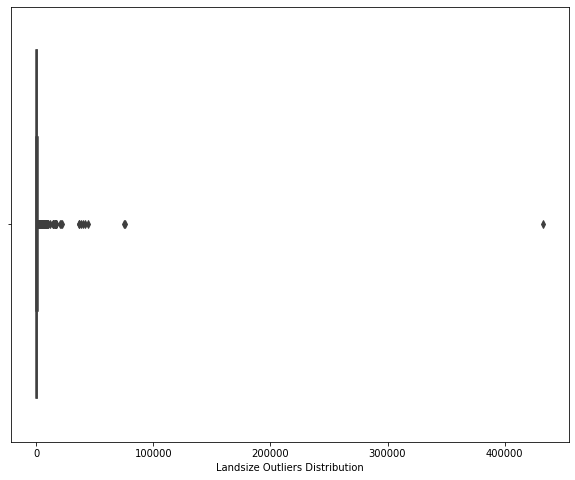

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df,x='Landsize')
ax.set_xlabel('Landsize Outliers Distribution')
plt.show()

The boxplot below show the distribution of outliers "Price", as we can see on the boxplot there are so many outliers beyond the upper limit

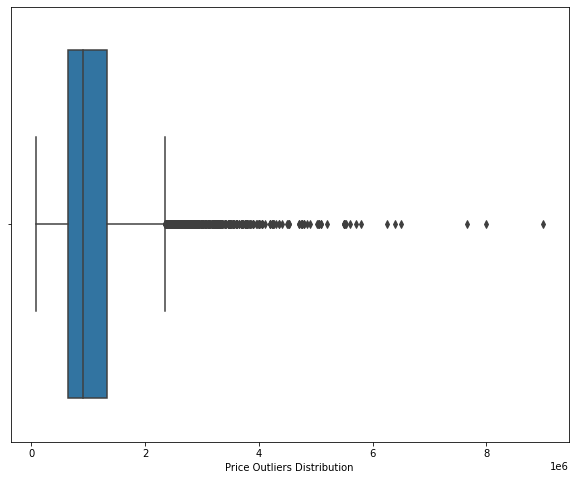

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df,x='Price')
ax.set_xlabel('Price Outliers Distribution')
plt.show()

Calculation of how many outliers in each plot "Landsize" & "Price"

In [47]:
upper_outliersL = df[(df['Landsize']>upper)].count()
lower_outliersL = df[(df['Landsize']<lower)].count()
upper_outliersP = df[(df['Price']>upperP)].count()
lower_outliersP = df[(df['Price']<lowerP)].count()
print(upper_outliersL)
print(lower_outliersL)
print(upper_outliersP)
print(lower_outliersP)

Suburb           368
Address          368
Rooms            368
Type             368
Price            368
Method           368
SellerG          368
Date             368
Distance         368
Postcode         368
Bedroom2         368
Bathroom         368
Car              365
Landsize         368
BuildingArea     177
YearBuilt        225
CouncilArea      332
Lattitude        368
Longtitude       368
Regionname       368
Propertycount    368
dtype: int64
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64
Suburb           612
Address          612
Rooms            612
Type             612
Price            612
Method           612
SellerG 

Cleaning the data of "Landsize" by removing the outliers listed from calculation

In [48]:
cleaned_landsize = df[(df['Landsize']<upper)]
cleaned_landsize['Landsize'].describe()

count    13212.00000
mean       414.82970
std        288.13084
min          0.00000
25%        170.00000
50%        418.00000
75%        640.00000
max       1357.00000
Name: Landsize, dtype: float64

Cleaning the data of "Price" by removing the outliers listed from calculation

In [49]:
cleaned_price = df[(df['Price']<upperP)]
cleaned_price['Price'].describe()

count    1.295600e+04
mean     9.813593e+05
std      4.529251e+05
min      8.500000e+04
25%      6.370000e+05
50%      8.800000e+05
75%      1.270000e+06
max      2.345000e+06
Name: Price, dtype: float64

Calculation for showing the difference after removing outliers

In [50]:
meanCL    = cleaned_landsize['Landsize'].mean()
medianCL  = cleaned_landsize['Landsize'].median()
q1CL      = np.quantile(cleaned_landsize['Landsize'],0.25)
q3CL      = np.quantile(cleaned_landsize['Landsize'],0.75)
iqrCL     = q3CL - q1CL
upperCL   = q3CL + (1.5*iqrCL)
lowerCL   = q1CL - (1.5*iqrCL)

meanCP    = cleaned_price['Price'].mean()
medianCP  = cleaned_price['Price'].median()
q1CP      = np.quantile(cleaned_price['Price'],0.25)
q3CP      = np.quantile(cleaned_price['Price'],0.75)
iqrCP     = q3CP - q1CP
upperCP   = q3CP + (1.5*iqrCP)
lowerCP   = q1CP - (1.5*iqrCP)

After removing the outliers, the data seems to be better, because the standard deviation is decreasing

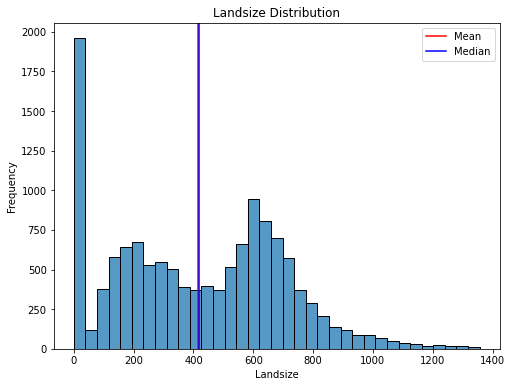

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(cleaned_landsize['Landsize'])
ax.set_title('Landsize Distribution')
ax.set_xlabel('Landsize')
ax.set_ylabel('Frequency')

ax.axvline(x=meanCL, label='Mean', color='r')
ax.axvline(x=medianCL, label='Median', color='b')
ax.legend()

plt.show()

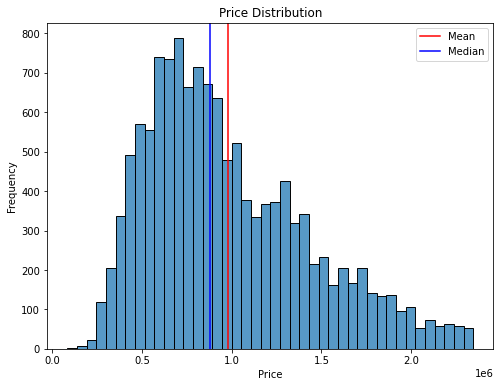

In [51]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(cleaned_price['Price'])
ax.set_title('Price Distribution')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

ax.axvline(x=meanCP, label='Mean', color='r')
ax.axvline(x=medianCP, label='Median', color='b')
ax.legend()

plt.show()

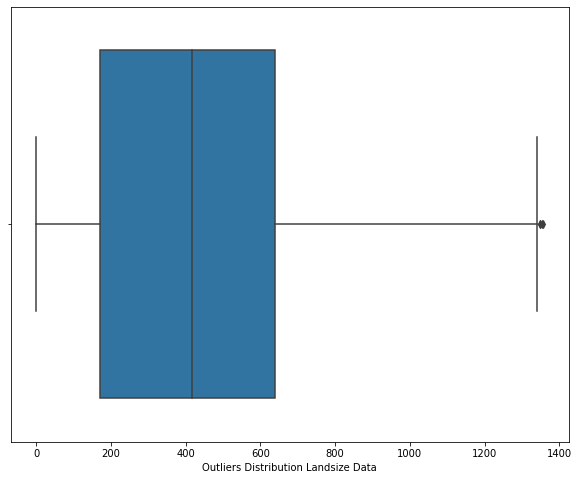

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=cleaned_landsize,x='Landsize')
ax.set_xlabel('Outliers Distribution Landsize Data')
plt.show()

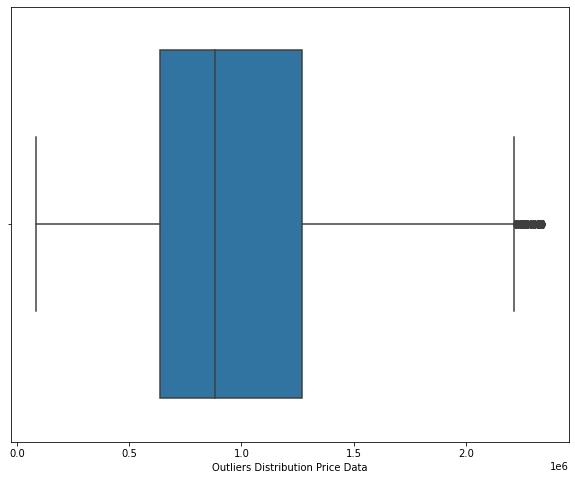

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=cleaned_price,x='Price')
ax.set_xlabel('Outliers Distribution Price Data')
plt.show()

2. Finding Outliers in Feature/Column Distance

In [56]:
dist = df[['Distance']]
dist

,Distance
0,2.5
1,2.5
2,2.5
3,2.5
4,2.5
...,...
13575,16.7
13576,6.8
13577,6.8
13578,6.8


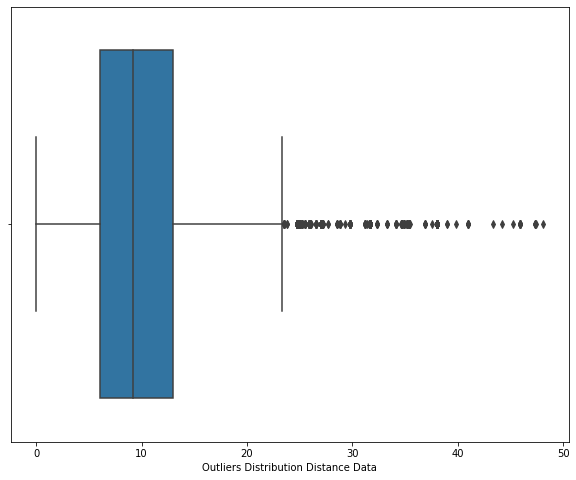

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=dist,x='Distance')
ax.set_xlabel('Outliers Distribution Distance Data')
plt.show()

In [64]:
q1Di      = np.quantile(dist['Distance'],0.25)
q3Di      = np.quantile(dist['Distance'],0.75)
iqrDi     = q3Di - q1Di
upperDi   = q3Di + (1.5*iqrDi)
lowerDi   = q1Di - (1.5*iqrDi)
outliers_distance = dist[(dist['Distance']>upperDi)].count()
outliers_distance

Distance    411
dtype: int64

There are 411 outliers or 3.0 % from data are outliers.

3. Distribution for Feature/Column Year Built

In [72]:
yb = df[['YearBuilt']]
yb

,YearBuilt
0,NaN
1,1900.0
2,1900.0
3,NaN
4,2014.0
...,...
13575,1981.0
13576,1995.0
13577,1997.0
13578,1920.0


there are some Nan data in YearBuilt, i thought it would be better to remove it before showing in plot

In [73]:
yb_new = yb.dropna()
yb_new

,YearBuilt
1,1900.0
2,1900.0
4,2014.0
6,1910.0
7,1890.0
...,...
13575,1981.0
13576,1995.0
13577,1997.0
13578,1920.0


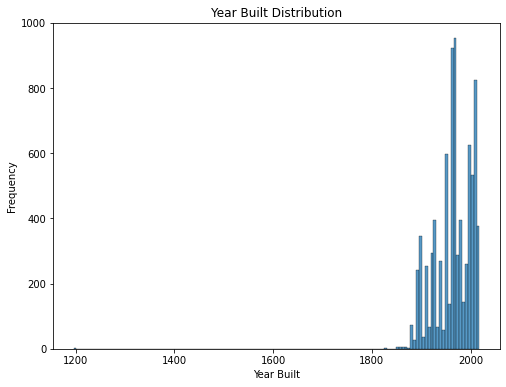

In [79]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(yb_new['YearBuilt'])
ax.set_title('Year Built Distribution')
ax.set_xlabel('Year Built')
ax.set_ylabel('Frequency')

plt.show()

In [ ]:
the histogram show that the distribution of house by year built are between 1900 until 2000

In [ ]:
4. Development of average Price based on Year Built

In [91]:
price_mean = df['Price'].mean()
price_mean

1075684.079455081

In [102]:
price_yb = df[['Price','YearBuilt']].groupby(['YearBuilt']).mean()
price_yb

,Price
YearBuilt,
1196.0,1.200000e+06
1830.0,8.550000e+05
1850.0,1.179500e+06
1854.0,3.310000e+06
1856.0,2.260000e+06
...,...
2014.0,9.219150e+05
2015.0,1.231485e+06
2016.0,1.523655e+06


Text(0, 0.5, 'Price')

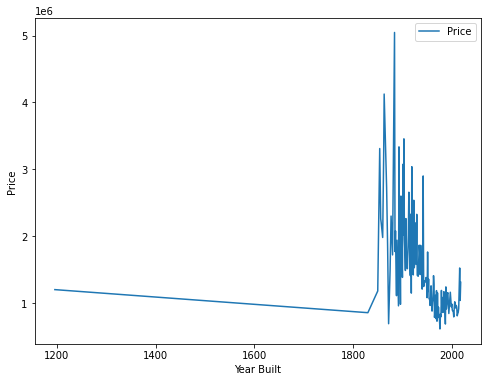

In [103]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data=price_yb)
ax.set_title('Average Price Development by Year')
ax.set_xlabel('Year Built')
ax.set_ylabel('Price')

the development of average price increasing after 1800 and decrease shortly after that until 2000. After 2000 the average price slightly increase for some points

## 5. Correlation between Landsize, Distance and Rooms to Price

i choose spearman correlation because all the data that will be correlated is numerical and non-linear

In [110]:
price_spearman = pd.DataFrame(df.corrwith(df['Price'], method='spearman'),columns=['Price'])
matrix_corr = df[['Price','Landsize','Distance','Rooms']].corr()
print(price_spearman)
matrix_corr

                  Price
Rooms          0.539886
Price          1.000000
Distance      -0.129990
Postcode       0.229903
Bedroom2       0.524029
Bathroom       0.427199
Car            0.288263
Landsize       0.327200
BuildingArea   0.631425
YearBuilt     -0.368080
Lattitude     -0.260322
Longtitude     0.261787
Propertycount -0.011409


,Price,Landsize,Distance,Rooms
Price,1.000000,0.037507,-0.162522,0.496634
Landsize,0.037507,1.000000,0.025004,0.025678
Distance,-0.162522,0.025004,1.000000,0.294203
Rooms,0.496634,0.025678,0.294203,1.000000


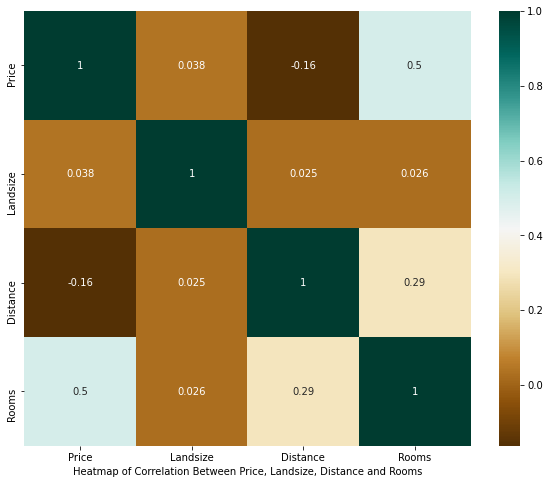

In [109]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=matrix_corr, annot=True, cmap='BrBG')
ax.set_xlabel('Heatmap of Correlation Between Price, Landsize, Distance and Rooms')
plt.show()

the heatmap shows us that the correlation between Price and Rooms has the Greatest value. Which means that the amount of the price will be mostly determined by the number of the room, the more room the higher the price will be.

## 6. Finding Regionname with higher average price


In [111]:
df_region = df.groupby('Regionname').mean().sort_values('Price', ascending = False)['Price']
df_region = df_region.reset_index()
df_region

,Regionname,Price
0,Southern Metropolitan,1.372963e+06
1,Eastern Metropolitan,1.104080e+06
2,South-Eastern Metropolitan,9.229438e+05
3,Northern Metropolitan,8.981711e+05
4,Western Metropolitan,8.664205e+05
5,Eastern Victoria,6.999808e+05
6,Northern Victoria,5.948293e+05
7,Western Victoria,3.975234e+05


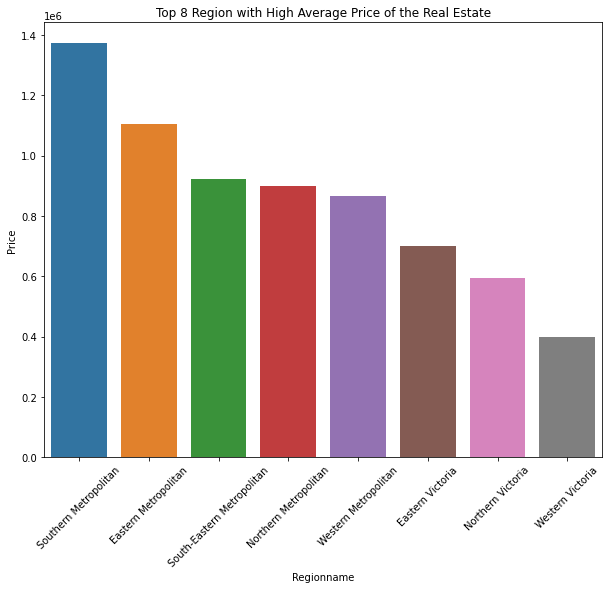

In [114]:
plt.figure(figsize = (10,8))
sns.barplot(data = df_region, x = 'Regionname', y = 'Price')
plt.title('Top 8 Region with High Average Price of the Real Estate')
plt.xticks(rotation = 45)
plt.show()

In [116]:
df_SM = df[df['Regionname'] == 'Southern Metropolitan']
df_SM

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
78,Albert Park,105 Kerferd Rd,2,h,1275000.0,S,hockingstuart,3/09/2016,3.3,3206.0,...,1.0,0.0,120.0,82.0,1900.0,Port Phillip,-37.84590,144.95550,Southern Metropolitan,3280.0
79,Albert Park,85 Richardson St,2,h,1455000.0,S,Thomson,3/09/2016,3.3,3206.0,...,1.0,0.0,159.0,NaN,NaN,Port Phillip,-37.84500,144.95380,Southern Metropolitan,3280.0
80,Albert Park,112 Beaconsfield Pde,3,h,2850000.0,PI,Buxton,4/03/2017,3.3,3206.0,...,2.0,0.0,211.0,198.0,1890.0,Port Phillip,-37.84810,144.94990,Southern Metropolitan,3280.0
81,Albert Park,94 Graham St,3,h,1850000.0,S,Greg,4/03/2017,3.3,3206.0,...,2.0,0.0,128.0,133.0,1890.0,Port Phillip,-37.84520,144.94880,Southern Metropolitan,3280.0
82,Albert Park,396 Montague St,2,h,1436000.0,S,RT,4/03/2017,3.3,3206.0,...,1.0,0.0,130.0,81.0,1900.0,Port Phillip,-37.84310,144.95650,Southern Metropolitan,3280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13524,Prahran,17 Packington Pl,2,h,1365000.0,S,Jellis,26/08/2017,4.6,3181.0,...,1.0,NaN,206.0,100.0,1900.0,NaN,-37.85569,145.00522,Southern Metropolitan,7717.0
13538,Sandringham,221 Bluff Rd,4,h,1490000.0,S,Buxton,26/08/2017,15.2,3191.0,...,2.0,2.0,503.0,168.0,1930.0,NaN,-37.95685,145.01977,Southern Metropolitan,4497.0
13553,Surrey Hills,20 Albert Cr,4,h,2720000.0,S,Kay,26/08/2017,10.2,3127.0,...,3.0,2.0,1005.0,NaN,1920.0,NaN,-37.82421,145.10352,Southern Metropolitan,5457.0
13554,Surrey Hills,46 Durham Rd,3,h,1715000.0,S,Noel,26/08/2017,10.2,3127.0,...,1.0,2.0,438.0,151.0,1906.0,NaN,-37.83015,145.09035,Southern Metropolitan,5457.0


In [120]:
t5 = df_SM.groupby('CouncilArea').mean().sort_values('Price', ascending = False)['Price'].head(5)
t5

CouncilArea
Bayside        1.652168e+06
Boroondara     1.646740e+06
Unavailable    1.325000e+06
Whitehorse     1.297237e+06
Stonnington    1.293382e+06
Name: Price, dtype: float64

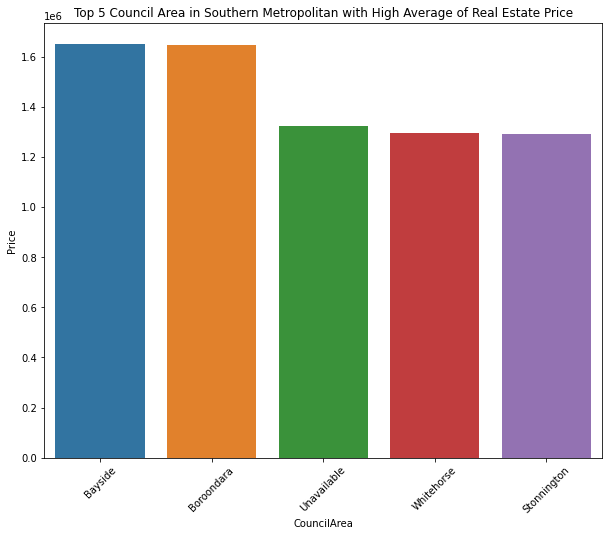

In [122]:
plt.figure(figsize = (10,8))
sns.barplot(data = t5.reset_index(), x = 'CouncilArea', y = 'Price')
plt.title('Top 5 Council Area in Southern Metropolitan with High Average of Real Estate Price')
plt.xticks(rotation = 45)
plt.show()

In [124]:
t4 = df_SM.groupby('Type').mean().sort_values('Price', ascending = False)['Price'].head(5)
t4

Type
h    1.802241e+06
t    1.205404e+06
u    6.648600e+05
Name: Price, dtype: float64

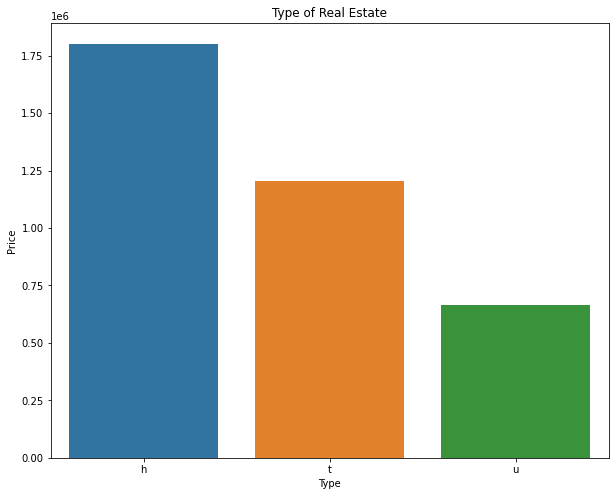

In [127]:
plt.figure(figsize = (10,8))
sns.barplot(data = t4.reset_index(), x = 'Type', y = 'Price')
plt.title('Type of Real Estate')
plt.show()

In [131]:
t3 = df_SM.groupby('Method').count().sort_values('Price', ascending = False)['Price'].head(1)
t3

Method
S    3038
Name: Price, dtype: int64